In [1]:
import numpy as np

class LogisticRegression:
    """
    A Logistic Regression classifier implementation from scratch.

    Logistic Regression is a linear classification algorithm used for
    binary classification problems. It models the probability of a binary
    outcome using the sigmoid function.

    Attributes:
        learning_rate (float): The step size for updating weights during training.
        n_iterations (int): The number of passes over the training data (epochs).
        weights (np.ndarray): A 1D NumPy array for the feature weights (coefficients).
        bias (float): The bias term (intercept).
    """

    def __init__(self, learning_rate: float = 0.01, n_iterations: int = 1000):
        """
        Initializes the Logistic Regression model.

        Args:
            learning_rate (float): Controls the step size of weight updates. Defaults to 0.01.
            n_iterations (int): The maximum number of epochs for training. Defaults to 1000.
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None  # Will be initialized during fit()
        self.bias = None     # Will be initialized during fit()

    def _sigmoid(self, z: np.ndarray) -> np.ndarray:
        """
        The sigmoid (logistic) activation function.

        This function maps any real-valued number to a value between 0 and 1,
        interpretable as a probability.

        g(z) = 1 / (1 + e^(-z))

        Args:
            z (np.ndarray): The net input (linear combination of features and weights).

        Returns:
            np.ndarray: The output of the sigmoid function, representing probabilities.
        """
        return 1 / (1 + np.exp(-z))

    def fit(self, X: np.ndarray, y: np.ndarray):
        """
        Trains the Logistic Regression model using Gradient Descent.

        The model learns the optimal weights and bias by minimizing the
        Log-Loss (Binary Cross-Entropy) cost function.

        Args:
            X (np.ndarray): The training features. A 2D NumPy array where
                            each row is a sample and each column is a feature.
            y (np.ndarray): The target labels. A 1D NumPy array of binary labels (0 or 1).

        Raises:
            ValueError: If input dimensions are inconsistent or labels are not binary.
        """
        n_samples, n_features = X.shape

        # Initialize weights to zeros (or small random values) and bias to zero.
        # Initializing with zeros is common.
        self.weights = np.zeros(n_features)
        self.bias = 0.0

        # Gradient Descent optimization loop
        for _ in range(self.n_iterations):
            # Calculate the linear combination of inputs and weights for all samples
            # z = X * weights + bias
            linear_model = np.dot(X, self.weights) + self.bias

            # Apply the sigmoid function to get the predicted probabilities (y_predicted)
            y_predicted = self._sigmoid(linear_model)

            # Calculate the gradients of the Log-Loss function with respect to weights and bias
            # Gradient of weights: (1/N) * X_transpose * (y_predicted - y_actual)
            # Gradient of bias:    (1/N) * sum(y_predicted - y_actual)
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias using the gradients and learning rate
            # w = w - learning_rate * dw
            # b = b - learning_rate * db
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

        print(f"Logistic Regression training finished. Learned weights: {self.weights}, bias: {self.bias}")


    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        """
        Predicts the probability of belonging to the positive class (class 1).

        Args:
            X (np.ndarray): The input features for prediction. A 2D NumPy array.

        Returns:
            np.ndarray: A 1D NumPy array of probabilities, values between 0 and 1.
        """
        linear_model = np.dot(X, self.weights) + self.bias
        probabilities = self._sigmoid(linear_model)
        return probabilities

    def predict(self, X: np.ndarray, threshold: float = 0.5) -> np.ndarray:
        """
        Makes binary class predictions based on a given probability threshold.

        Args:
            X (np.ndarray): The input features for prediction. A 2D NumPy array.
            threshold (float): The probability threshold for classification.
                               If predicted probability >= threshold, predict 1, else 0.
                               Defaults to 0.5.

        Returns:
            np.ndarray: A 1D NumPy array of predicted binary labels (0 or 1).
        """
        probabilities = self.predict_proba(X)
        # Convert probabilities to binary class labels based on the threshold
        return (probabilities >= threshold).astype(int)

Training Data (X_train):
[[0.5 1.5]
 [1.  2. ]
 [1.5 2.5]
 [3.  4. ]
 [3.5 4.5]
 [4.  5. ]]

Training Labels (y_train):
[0 0 0 1 1 1]

--- Starting Logistic Regression Training ---
Logistic Regression training finished. Learned weights: [ 5.98658073 -1.6932301 ], bias: -7.679810830093971
--- Logistic Regression Training Completed ---

Test Data (X_test):
[[0.8 1.8]
 [2.2 3.2]
 [3.8 4.8]
 [1.  4. ]]

Predicted Probabilities on Test Data:
[2.62941652e-03 5.18074732e-01 9.99034300e-01 2.10429272e-04]

Binary Predictions on Test Data (threshold=0.5):
[0 1 1 0]


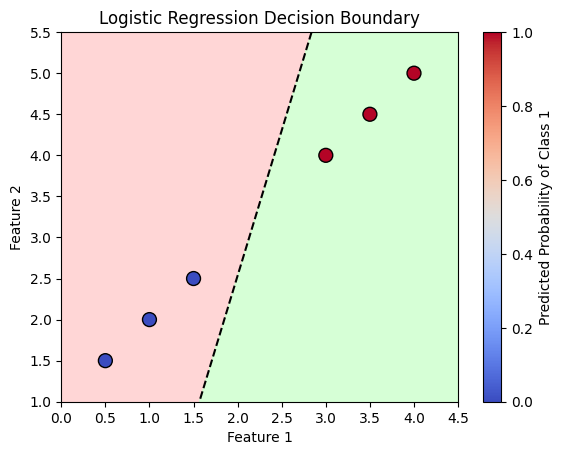

In [2]:
# --- Usage Example ---
if __name__ == "__main__":
    # 1. Prepare some synthetic (dummy) data for binary classification
    # This data is linearly separable, which works well for Logistic Regression.
    # We'll use a slightly different set than Perceptron for variety.
    X_train = np.array([
        [0.5, 1.5], # Class 0
        [1.0, 2.0], # Class 0
        [1.5, 2.5], # Class 0
        [3.0, 4.0], # Class 1
        [3.5, 4.5], # Class 1
        [4.0, 5.0]  # Class 1
    ])
    y_train = np.array([0, 0, 0, 1, 1, 1])

    print("Training Data (X_train):")
    print(X_train)
    print("\nTraining Labels (y_train):")
    print(y_train)

    # 2. Create a Logistic Regression instance
    # We can experiment with different learning_rate and n_iterations values.
    logistic_model = LogisticRegression(learning_rate=0.1, n_iterations=5000)

    # 3. Train the Logistic Regression model
    print("\n--- Starting Logistic Regression Training ---")
    logistic_model.fit(X_train, y_train)
    print("--- Logistic Regression Training Completed ---")

    # 4. Make predictions on new data
    X_test = np.array([
        [0.8, 1.8],
        [2.2, 3.2],
        [3.8, 4.8],
        [1.0, 4.0]
    ])

    print("\nTest Data (X_test):")
    print(X_test)

    # Get predicted probabilities
    probabilities = logistic_model.predict_proba(X_test)
    print("\nPredicted Probabilities on Test Data:")
    print(probabilities)

    # Get binary predictions
    predictions = logistic_model.predict(X_test)
    print("\nBinary Predictions on Test Data (threshold=0.5):")
    print(predictions)

    # Optional: Visualize the decision boundary (requires matplotlib)
    try:
        import matplotlib.pyplot as plt

        # Plotting the decision boundary
        # The decision boundary is where P(y=1|x) = 0.5, which means w.x + b = 0
        x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
        y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                             np.linspace(y_min, y_max, 100))

        # Predict probabilities for the meshgrid points
        Z = logistic_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], colors=['#FFCCCC', '#CCFFCC'], alpha=0.8) # Red for 0, Green for 1
        plt.contour(xx, yy, Z, levels=[0.5], colors='black', linestyles='--') # Decision boundary at 0.5 probability

        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', marker='o', s=100)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Logistic Regression Decision Boundary')
        plt.colorbar(label='Predicted Probability of Class 1')
        plt.show()

    except ImportError:
        print("\nMatplotlib not installed. Skipping visualization example.")